In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine=create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year=dt.date(2017,8,23)-dt.timedelta(days=365)
#print(prev_year)
# Perform a query to retrieve the data and precipitation scores
results=[]
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=['date','precipitation'])
df.set_index(df['date'],inplace= True)
# Covert Dataframme to String & set index to false
print(df.to_string(index=False))
# Sort the dataframe by date
df=df.sort_index()
df

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

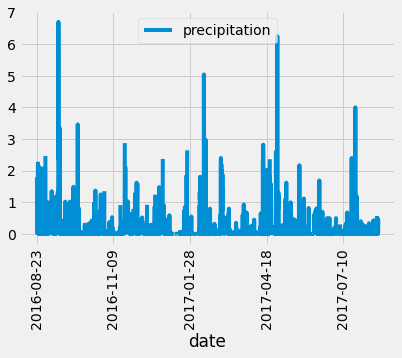

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
#Find the Number of Stations
session.query(func.count(Station.station)).all()


[(9,)]

In [14]:
# How many stations are available in this dataset?


In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

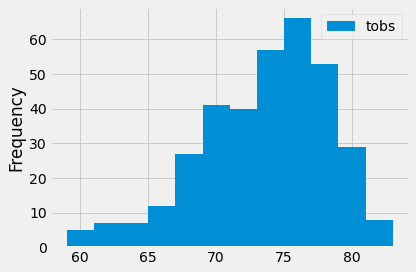

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results= session.query(Measurement.tobs).\
filter(Measurement.station =='USC00519281').\
filter(Measurement.date >= prev_year).all()
df=pd.DataFrame(results, columns=['tobs'])
df
df.plot.hist(bins=12)
plt.tight_layout()

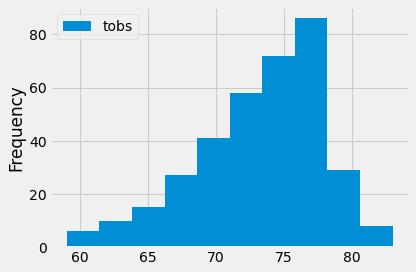

In [18]:
df.plot.hist()
plt.tight_layout()

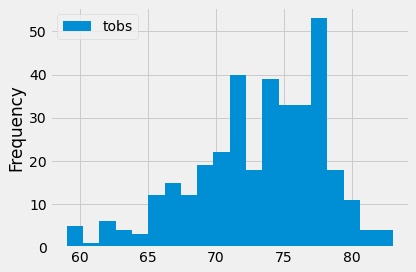

In [19]:
df.plot.hist(bins=20)
plt.tight_layout()

In [20]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temp(start_date,end_date) :
   print(start_date,end_date)
   min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date <= end_date).all()
   max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date <= end_date).all()
   avg_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date <= end_date).all()
   return(min_temp,max_temp,avg_temp) 

In [21]:
start_date=dt.date(2017,5,1)-dt.timedelta()
end_date=dt.date(2017,5,31)-dt.timedelta()
print(start_date,end_date)
min,max,avr=calc_temp(start_date,end_date)
print(min,max,avr)

2017-05-01 2017-05-31
2017-05-01 2017-05-31
[(66.0,)] [(87.0,)] [(75.26785714285714,)]


# Challenge